## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
#find lat and long of city center then subtract out lat and long form it to find the difference 
# weak correlation to test in model Floor waterfront view and grade 

In [2]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
from datetime import datetime
import statsmodels.formula.api as sm
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy import stats
import math
from PIL import Image
import hvplot.pandas
%matplotlib inline

In [3]:
#Read dataset
df1 = pd.read_csv("data/kc_house_data.csv")
df_income = pd.read_csv("data/dc_housing_income_by_zip.csv")#source https://www.kaggle.com/christophercorrea/dc-residential-properties?select=raw_residential_data.csv

In [4]:
#Exploring the first dataset
df1

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0          5650     1.0        NaN  NONE  ...      7 Average       1180   
1          7242     2.0         NO  NONE  ...      7 Average       2170   
2         10000     1.0         NO  NONE  ...  6 Low Average        770   
3          5000     1.0         NO  NONE  ...      7 Average       1050   
4          8080     1.0         NO  NONE  ...         8 Good       1680   
...         ...     ...        ...   ...  ...            ...        ...   
21592      1131     3.0         NO  NONE  ...         8 Good       1530   
21593      5813     2.0         NO  NONE  ...         8 Good       2310   
21594      1350     2.0         NO  NONE  ...      7 Average       1020   
21595      2388     2.0        NaN  NONE  ...         8 Good       1600   
21596      1076     2.0         NO  NONE  ...      7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [5]:
#Exploring income data
income = df_income.groupby("zipcode").mean().round()
income

Income
zipcode          
98001    165075.0
98002    111345.0
98003    178132.0
98004    728930.0
98005    240829.0
...           ...
99371       917.0
99401      1006.0
99402      8498.0
99403     80299.0
99999    743438.0

[496 rows x 1 columns]

In [6]:
#Merging dataset on Zipcode
df = df1.merge(income, on ="zipcode")

In [7]:
#Exploring new dataset with income included
df

id        date      price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014   221900.0         3       1.00         1180   
1      4060000240   6/23/2014   205425.0         2       1.00          880   
2      4058801670   7/17/2014   445000.0         3       2.25         2100   
3      2976800796   9/25/2014   236000.0         3       1.00         1300   
4      6874200960   2/27/2015   170000.0         2       1.00          860   
...           ...         ...        ...       ...        ...          ...   
21592  2525049086   10/3/2014  2720000.0         4       3.25         3990   
21593  2525049113   7/25/2014  1950000.0         4       3.50         4065   
21594  3262300485   4/21/2015  2250000.0         5       5.25         3410   
21595  6447300365  11/13/2014  2900000.0         5       4.00         5190   
21596  3262300818   2/27/2015  1870000.0         4       3.75         3790   

       sqft_lot  floors waterfront     view  ... sqft_above sqft_basement  \
0          5650     1.0        NaN     NONE  ...       1180           0.0   
1          6780     1.0         NO     NONE  ...        880           0.0   
2          8201     1.0        NaN  AVERAGE  ...       1620         480.0   
3          5898     1.0        NaN     NONE  ...       1300           0.0   
4          5265     1.0         NO     NONE  ...        860           0.0   
...         ...     ...        ...      ...  ...        ...           ...   
21592     18115     2.0         NO     NONE  ...       3990           0.0   
21593     18713     2.0         NO     NONE  ...       4065           0.0   
21594      8118     2.0        NaN     NONE  ...       3410           0.0   
21595     14600     2.0         NO     FAIR  ...       5190           0.0   
21596      8797     2.0         NO     NONE  ...       3290         500.0   

       yr_built yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955          0.0    98178  47.5112 -122.257           1340   
1          1945          0.0    98178  47.5009 -122.248           1190   
2          1967          0.0    98178  47.5091 -122.244           2660   
3          1961          NaN    98178  47.5053 -122.255           1320   
4          1931          0.0    98178  47.5048 -122.272           1650   
...         ...          ...      ...      ...      ...            ...   
21592      1989          NaN    98039  47.6177 -122.229           3450   
21593      1987          0.0    98039  47.6209 -122.237           3070   
21594      2006          0.0    98039  47.6295 -122.236           3410   
21595      2013          0.0    98039  47.6102 -122.225           3840   
21596      2006          NaN    98039  47.6351 -122.236           2660   

       sqft_lot15    Income  
0            5650  112998.0  
1            6780  112998.0  
2            8712  112998.0  
3            7619  112998.0  
4            8775  112998.0  
...           ...       ...  
21592       16087  212074.0  
21593       18713  212074.0  
21594       16236  212074.0  
21595       19250  212074.0  
21596       12150  212074.0  

[21597 rows x 22 columns]

In [8]:
#Converting dates to quarters 
df['date'] = pd.to_datetime(df['date'])
df["quarter"] = df['date'].dt.quarter

In [9]:
#Dropping ID
#Dropping waterfront and yr_renovated first because of low correlation to price and significant NA values, if NAs are dropped first before these 2 rows are removed we lose about 5000 extra rows of data
df = df.drop(["yr_renovated", "waterfront", "id"], axis=1)

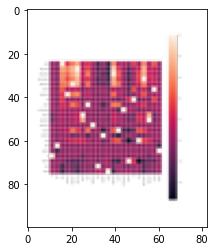

In [10]:
#showing weak correlation to justify removing waterfront and yr_renovated before dropping NAs
img = Image.open('outputs/waterfront_yr_renovated.png')
img.thumbnail((100, 100))  # resizes image in-place
imgplot = plt.imshow(img)

In [11]:
#Checking NA values
df.isna().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
view             63
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
Income            0
quarter           0
dtype: int64

In [12]:
#dropping NAs
df.dropna()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2014-10-13   221900.0         3       1.00         1180      5650   
1     2014-06-23   205425.0         2       1.00          880      6780   
2     2014-07-17   445000.0         3       2.25         2100      8201   
3     2014-09-25   236000.0         3       1.00         1300      5898   
4     2015-02-27   170000.0         2       1.00          860      5265   
...          ...        ...       ...        ...          ...       ...   
21592 2014-10-03  2720000.0         4       3.25         3990     18115   
21593 2014-07-25  1950000.0         4       3.50         4065     18713   
21594 2015-04-21  2250000.0         5       5.25         3410      8118   
21595 2014-11-13  2900000.0         5       4.00         5190     14600   
21596 2015-02-27  1870000.0         4       3.75         3790      8797   

       floors     view condition          grade  sqft_above sqft_basement  \
0         1.0     NONE   Average      7 Average        1180           0.0   
1         1.0     NONE      Good  6 Low Average         880           0.0   
2         1.0  AVERAGE   Average         8 Good        1620         480.0   
3         1.0     NONE   Average      7 Average        1300           0.0   
4         1.0     NONE   Average  6 Low Average         860           0.0   
...       ...      ...       ...            ...         ...           ...   
21592     2.0     NONE      Good   11 Excellent        3990           0.0   
21593     2.0     NONE      Good   10 Very Good        4065           0.0   
21594     2.0     NONE   Average   11 Excellent        3410           0.0   
21595     2.0     FAIR   Average   11 Excellent        5190           0.0   
21596     2.0     NONE   Average   11 Excellent        3290         500.0   

       yr_built  zipcode      lat     long  sqft_living15  sqft_lot15  \
0          1955    98178  47.5112 -122.257           1340        5650   
1          1945    98178  47.5009 -122.248           1190        6780   
2          1967    98178  47.5091 -122.244           2660        8712   
3          1961    98178  47.5053 -122.255           1320        7619   
4          1931    98178  47.5048 -122.272           1650        8775   
...         ...      ...      ...      ...            ...         ...   
21592      1989    98039  47.6177 -122.229           3450       16087   
21593      1987    98039  47.6209 -122.237           3070       18713   
21594      2006    98039  47.6295 -122.236           3410       16236   
21595      2013    98039  47.6102 -122.225           3840       19250   
21596      2006    98039  47.6351 -122.236           2660       12150   

         Income  quarter  
0      112998.0        4  
1      112998.0        2  
2      112998.0        3  
3      112998.0        3  
4      112998.0        1  
...         ...      ...  
21592  212074.0        4  
21593  212074.0        3  
21594  212074.0        2  
21595  212074.0        4  
21596  212074.0        1  

[21534 rows x 20 columns]

In [13]:
#Function to convert categorical data 
def convert_categorical(column_names):
    for column_name in column_names:
        df[column_name] = pd.Categorical(df[column_name])
        df[column_name] = df[column_name].cat.codes

In [14]:
#Converting categorical columns
convert_categorical(["view","condition","grade","date"])

In [15]:
#Checking variable types in dataset
df.dtypes

date               int16
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
view                int8
condition           int8
grade               int8
sqft_above         int64
sqft_basement     object
yr_built           int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
Income           float64
quarter            int64
dtype: object

In [16]:
df.shape

(21597, 20)

In [17]:
#Removing outliers from dataset
df = df[(np.abs(stats.zscore(df.select_dtypes(include=np.number))) < 3).all(axis=1)]

In [18]:
df.shape

(18319, 20)

In [19]:
df.corr().sort_values(by="price", ascending=False)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
price         -0.000741  1.000000  0.284707   0.421434     0.592802  0.072772   
sqft_living   -0.030106  0.592802  0.619010   0.697391     1.000000  0.206697   
sqft_living15 -0.026251  0.516416  0.398923   0.518313     0.723458  0.253343   
sqft_above    -0.020277  0.472305  0.490116   0.614623     0.831061  0.186547   
Income        -0.039473  0.450502  0.073383   0.111338     0.138310 -0.072895   
lat           -0.034887  0.432235 -0.040463  -0.008891     0.019997 -0.069301   
bathrooms     -0.031132  0.421434  0.490165   1.000000     0.697391  0.039748   
grade         -0.031306  0.313975  0.236667   0.411390     0.389985  0.015668   
bedrooms      -0.011701  0.284707  1.000000   0.490165     0.619010  0.099258   
floors        -0.016210  0.247005  0.150792   0.501099     0.317262 -0.124874   
sqft_lot      -0.016938  0.072772  0.099258   0.039748     0.206697  1.000000   
condition     -0.051377  0.061055  0.024953  -0.147666    -0.058865  0.059809   
sqft_lot15    -0.020961  0.056128  0.097093   0.042038     0.202277  0.809011   
zipcode        0.001126  0.027284 -0.164709  -0.212587    -0.198522 -0.172688   
long          -0.003227  0.020193  0.167897   0.257575     0.276986  0.259747   
date           1.000000 -0.000741 -0.011701  -0.031132    -0.030106 -0.016938   
yr_built       0.001090 -0.007402  0.160208   0.540249     0.317635  0.010136   
quarter       -0.303195 -0.010218 -0.001179   0.012651     0.019240 -0.003166   
view           0.000297 -0.264916 -0.022996  -0.070999    -0.147062 -0.054234   

                 floors      view  condition     grade  sqft_above  yr_built  \
price          0.247005 -0.264916   0.061055  0.313975    0.472305 -0.007402   
sqft_living    0.317262 -0.147062  -0.058865  0.389985    0.831061  0.317635   
sqft_living15  0.246453 -0.177461  -0.106713  0.348757    0.695517  0.333795   
sqft_above     0.525224 -0.047849  -0.178662  0.379158    1.000000  0.439656   
Income         0.085131  0.016188   0.058694  0.152021    0.099161 -0.013197   
lat            0.034826 -0.008223  -0.013174  0.063804   -0.048128 -0.162766   
bathrooms      0.501099 -0.070999  -0.147666  0.411390    0.614623  0.540249   
grade          0.323579 -0.054888  -0.118308  1.000000    0.379158  0.344417   
bedrooms       0.150792 -0.022996   0.024953  0.236667    0.490116  0.160208   
floors         1.000000  0.018267  -0.292989  0.323579    0.525224  0.499849   
sqft_lot      -0.124874 -0.054234   0.059809  0.015668    0.186547  0.010136   
condition     -0.292989 -0.040445   1.000000 -0.118308   -0.178662 -0.382900   
sqft_lot15    -0.134450 -0.055385   0.067985  0.025970    0.187183  0.030008   
zipcode       -0.055975 -0.096598  -0.003964 -0.119075   -0.273598 -0.343150   
long           0.125909  0.099417  -0.091780  0.132440    0.389968  0.419925   
date          -0.016210  0.000297  -0.051377 -0.031306   -0.020277  0.001090   
yr_built       0.499849  0.069244  -0.382900  0.344417    0.439656  1.000000   
quarter        0.012756 -0.003614   0.017019  0.019681    0.013463 -0.007133   
view           0.018267  1.000000  -0.040445 -0.054888   -0.047849  0.069244   

                zipcode       lat      long  sqft_living15  sqft_lot15  \
price          0.027284  0.432235  0.020193       0.516416    0.056128   
sqft_living   -0.198522  0.019997  0.276986       0.723458    0.202277   
sqft_living15 -0.282852  0.015943  0.381866       1.000000    0.273125   
sqft_above    -0.273598 -0.048128  0.389968       0.695517    0.187183   
Income        -0.125398  0.387271  0.041440       0.186646   -0.074777   
lat            0.287645  1.000000 -0.140444       0.015943   -0.076123   
bathrooms     -0.212587 -0.008891  0.257575       0.518313    0.042038   
grade         -0.119075  0.063804  0.132440       0.348757    0.025970   
bedrooms      -0.164709 -0.040463  0.167897       0.398923    0.097093   
floors        -0.055975  0.034826  0.125909       0.24645

In [20]:
#Dropping data with weak correlation
#Dropping sqft_above due to correlation to sqft_living,
df = df.drop(["date", "lat", "long","sqft_basement","sqft_living15","sqft_above","sqft_lot15","sqft_lot","zipcode","yr_built","condition","quarter", "view"], axis=1)


In [21]:
#Checking correlation between variables
#Highest correlation to price is sqft_living, income,  
df.corr().sort_values(by="price", ascending=False)

price  bedrooms  bathrooms  sqft_living    floors     grade  \
price        1.000000  0.284707   0.421434     0.592802  0.247005  0.313975   
sqft_living  0.592802  0.619010   0.697391     1.000000  0.317262  0.389985   
Income       0.450502  0.073383   0.111338     0.138310  0.085131  0.152021   
bathrooms    0.421434  0.490165   1.000000     0.697391  0.501099  0.411390   
grade        0.313975  0.236667   0.411390     0.389985  0.323579  1.000000   
bedrooms     0.284707  1.000000   0.490165     0.619010  0.150792  0.236667   
floors       0.247005  0.150792   0.501099     0.317262  1.000000  0.323579   

               Income  
price        0.450502  
sqft_living  0.138310  
Income       1.000000  
bathrooms    0.111338  
grade        0.152021  
bedrooms     0.073383  
floors       0.085131

In [22]:
#Cell to test which of the weaker correlation could improve prediction
#df = df.drop(["waterfront"], axis = 1)

In [23]:
df.head(7)

price  bedrooms  bathrooms  sqft_living  floors  grade    Income
0  221900.0         3       1.00         1180     1.0      8  112998.0
1  205425.0         2       1.00          880     1.0      7  112998.0
3  236000.0         3       1.00         1300     1.0      8  112998.0
4  170000.0         2       1.00          860     1.0      7  112998.0
5  245000.0         3       1.75         1740     1.0      8  112998.0
6  165000.0         4       1.00         1000     1.0      7  112998.0
7  239900.0         4       1.00         1000     1.0      7  112998.0

In [24]:
data5 = preprocessing.StandardScaler().fit_transform(df)
data5

array([[-1.11521527, -0.35058787, -1.48668553, ..., -0.86201517,
        -0.32406574, -1.16277154],
       [-1.19045221, -1.51745183, -1.48668553, ..., -0.86201517,
        -1.2487636 , -1.16277154],
       [-1.05082433, -0.35058787, -1.48668553, ..., -0.86201517,
        -0.32406574, -1.16277154],
       ...,
       [ 4.49319031,  1.98314005,  1.09043033, ..., -0.86201517,
         1.52532999, -0.40993905],
       [ 4.03651695, -0.35058787, -0.0140479 , ..., -0.86201517,
        -0.32406574, -0.40993905],
       [ 4.31052096,  0.81627609,  0.35411151, ...,  0.99632622,
         1.52532999, -0.40993905]])

In [25]:
#y = (x – min) / (max – min)
data = preprocessing.StandardScaler().fit_transform(df.to_numpy())
data

array([[-1.11521527, -0.35058787, -1.48668553, ..., -0.86201517,
        -0.32406574, -1.16277154],
       [-1.19045221, -1.51745183, -1.48668553, ..., -0.86201517,
        -1.2487636 , -1.16277154],
       [-1.05082433, -0.35058787, -1.48668553, ..., -0.86201517,
        -0.32406574, -1.16277154],
       ...,
       [ 4.49319031,  1.98314005,  1.09043033, ..., -0.86201517,
         1.52532999, -0.40993905],
       [ 4.03651695, -0.35058787, -0.0140479 , ..., -0.86201517,
        -0.32406574, -0.40993905],
       [ 4.31052096,  0.81627609,  0.35411151, ...,  0.99632622,
         1.52532999, -0.40993905]])

In [26]:
#Seperating the data for modeling regression modeling
y = data[:, 0]
y

array([-1.11521527, -1.19045221, -1.05082433, ...,  4.49319031,
        4.03651695,  4.31052096])

In [27]:
X = data[:,1:]
X

array([[-0.35058787, -1.48668553, -1.02433876, -0.86201517, -0.32406574,
        -1.16277154],
       [-1.51745183, -1.48668553, -1.44943124, -0.86201517, -1.2487636 ,
        -1.16277154],
       [-0.35058787, -1.48668553, -0.85430176, -0.86201517, -0.32406574,
        -1.16277154],
       ...,
       [ 1.98314005,  1.09043033,  1.68208338, -0.86201517,  1.52532999,
        -0.40993905],
       [-0.35058787, -0.0140479 ,  0.23676894, -0.86201517, -0.32406574,
        -0.40993905],
       [ 0.81627609,  0.35411151,  1.90879937,  0.99632622,  1.52532999,
        -0.40993905]])

In [28]:
#is there a baseline rule for choosing how many should be in random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14655, 6)
(3664, 6)
(14655,)
(3664,)


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression().fit(X_train, y_train)

In [32]:
accuracy = model.score(X_train, y_train)
accuracy

0.5023356636852503

In [33]:
test_model = LinearRegression().fit(X_test, y_test)

In [34]:
test_accuracy = model.score(X_test, y_test)
test_accuracy

0.5049802730491351

In [35]:
#result = sm.ols(formula="price ~ bedrooms + bathrooms+ sqft_living + sqft_lot + floors + waterfront + view + condition + sqft_above + yr_built + yr_renovated + zipcode + sqft_living15 + sqft_lot15", data=df1).fit()
#print(result.summary())

In [36]:
df

price  bedrooms  bathrooms  sqft_living  floors  grade    Income
0       221900.0         3       1.00         1180     1.0      8  112998.0
1       205425.0         2       1.00          880     1.0      7  112998.0
3       236000.0         3       1.00         1300     1.0      8  112998.0
4       170000.0         2       1.00          860     1.0      7  112998.0
5       245000.0         3       1.75         1740     1.0      8  112998.0
...          ...       ...        ...          ...     ...    ...       ...
21579  1620000.0         4       2.25         2350     2.0     10  212074.0
21581  1200000.0         4       3.00         2150     2.0      9  212074.0
21584  1450000.0         5       2.75         3090     1.0     10  212074.0
21587  1350000.0         3       2.00         2070     1.0      8  212074.0
21589  1410000.0         4       2.25         3250     2.0     10  212074.0

[18319 rows x 7 columns]

In [37]:
#result = sm.ols(formula="price ~ sqft_living", data=df).fit()
#print(result.summary())

In [38]:
df

price  bedrooms  bathrooms  sqft_living  floors  grade    Income
0       221900.0         3       1.00         1180     1.0      8  112998.0
1       205425.0         2       1.00          880     1.0      7  112998.0
3       236000.0         3       1.00         1300     1.0      8  112998.0
4       170000.0         2       1.00          860     1.0      7  112998.0
5       245000.0         3       1.75         1740     1.0      8  112998.0
...          ...       ...        ...          ...     ...    ...       ...
21579  1620000.0         4       2.25         2350     2.0     10  212074.0
21581  1200000.0         4       3.00         2150     2.0      9  212074.0
21584  1450000.0         5       2.75         3090     1.0     10  212074.0
21587  1350000.0         3       2.00         2070     1.0      8  212074.0
21589  1410000.0         4       2.25         3250     2.0     10  212074.0

[18319 rows x 7 columns]

In [39]:
X = df["price"]

In [40]:
X = df.drop("price", axis=1)

In [41]:
model = sm.OLS(y, sm.add_constant(X.astype(float)), missing = "drop").fit()
results = model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     3090.
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        07:27:59   Log-Likelihood:                -19588.
No. Observations:               18319   AIC:                         3.919e+04
Df Residuals:                   18312   BIC:                         3.925e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.3132      0.044    -53.022      

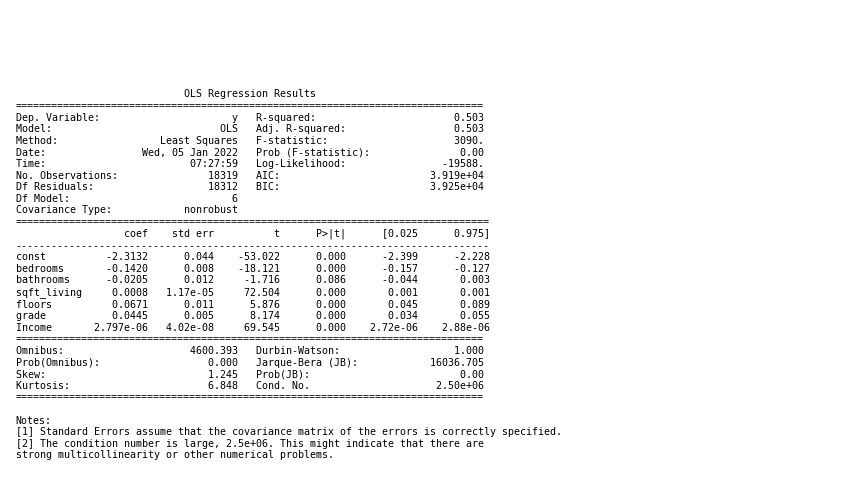

In [42]:
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('outputs/output.png')

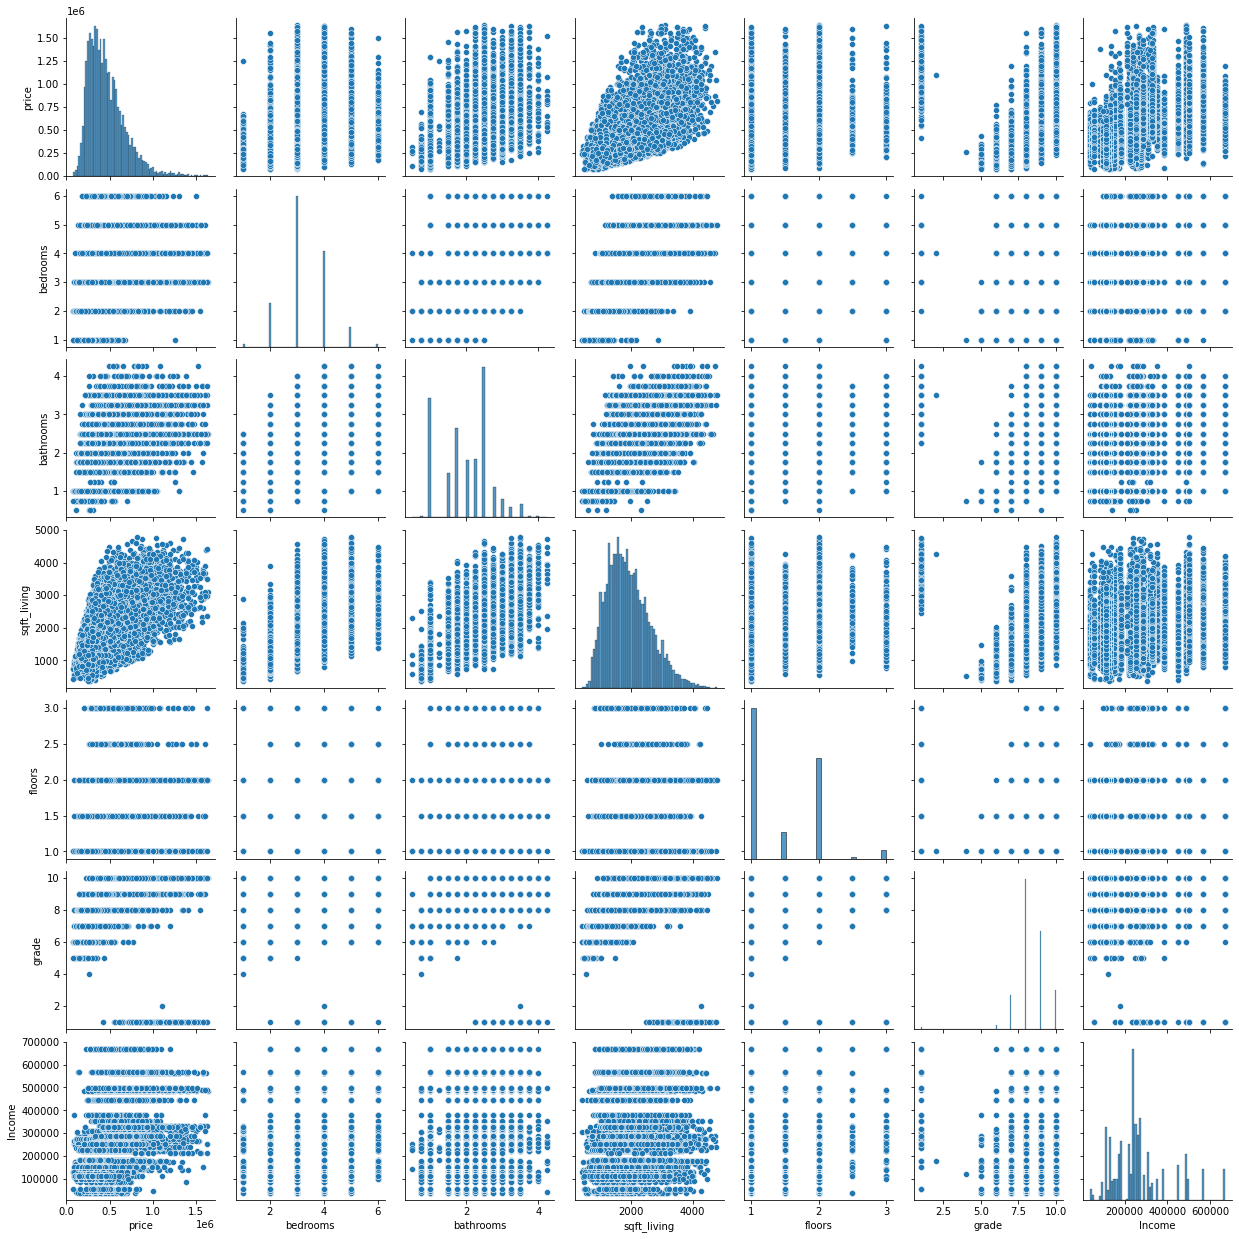

In [43]:
sns.pairplot(df)

In [44]:
corr = df.corr().sort_values(by="price", ascending=False)

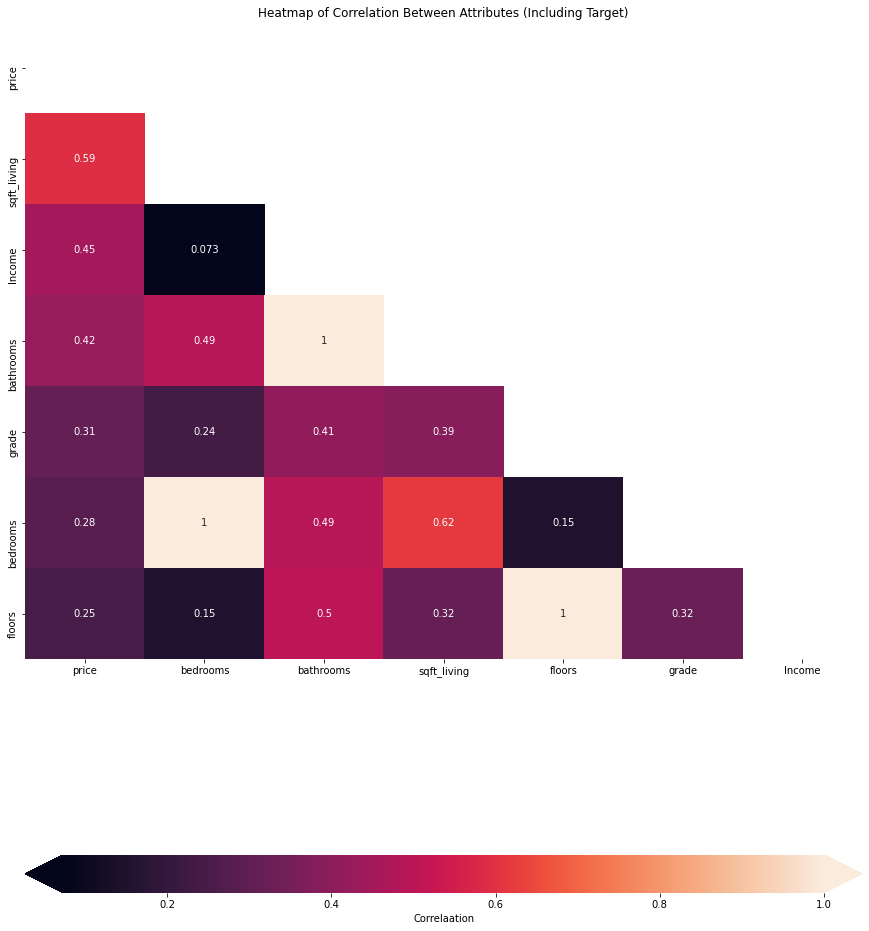

In [45]:
fig, ax = plt.subplots(figsize=(15,18))
sns.heatmap(data = corr, mask = np.triu(np.ones_like(corr, dtype=bool)), ax = ax, annot = True, cbar_kws = {"label": "Correlaation", "orientation": "horizontal", "pad": .2, "extend": "both"})

ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");


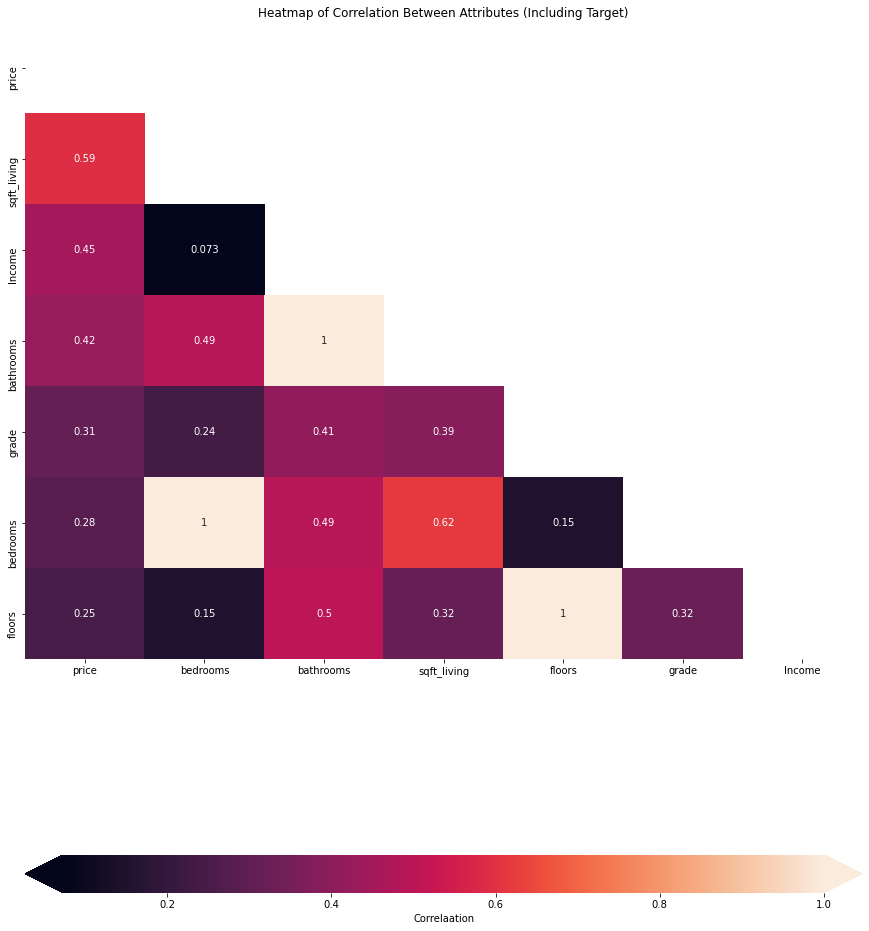

In [46]:
fig, ax = plt.subplots(figsize=(15,18))
sns.heatmap(data = corr, mask = np.triu(np.ones_like(corr, dtype=bool)), ax = ax, annot = True, cbar_kws = {"label": "Correlaation", "orientation": "horizontal", "pad": .2, "extend": "both"})

ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [47]:
#Checking correlation between price and other variables
corr = df.corr().sort_values(by="price", ascending=False)
corr

price  bedrooms  bathrooms  sqft_living    floors     grade  \
price        1.000000  0.284707   0.421434     0.592802  0.247005  0.313975   
sqft_living  0.592802  0.619010   0.697391     1.000000  0.317262  0.389985   
Income       0.450502  0.073383   0.111338     0.138310  0.085131  0.152021   
bathrooms    0.421434  0.490165   1.000000     0.697391  0.501099  0.411390   
grade        0.313975  0.236667   0.411390     0.389985  0.323579  1.000000   
bedrooms     0.284707  1.000000   0.490165     0.619010  0.150792  0.236667   
floors       0.247005  0.150792   0.501099     0.317262  1.000000  0.323579   

               Income  
price        0.450502  
sqft_living  0.138310  
Income       1.000000  
bathrooms    0.111338  
grade        0.152021  
bedrooms     0.073383  
floors       0.085131

## Other EDA Plots

In [48]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {df}', fontsize=15)
    plt.show()

In [49]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

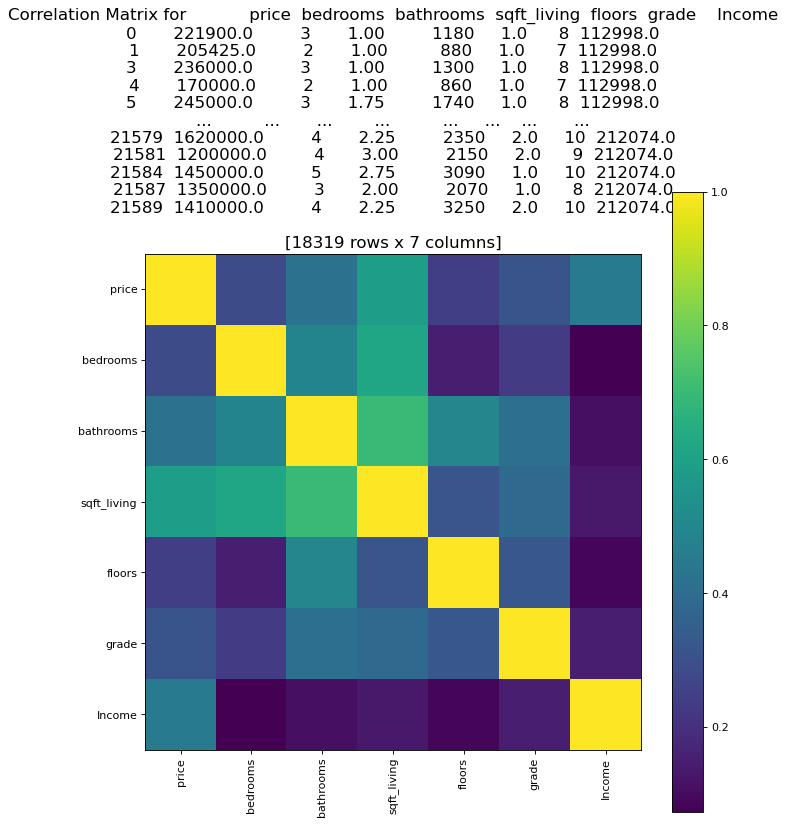

In [50]:
plotCorrelationMatrix(df, 10)


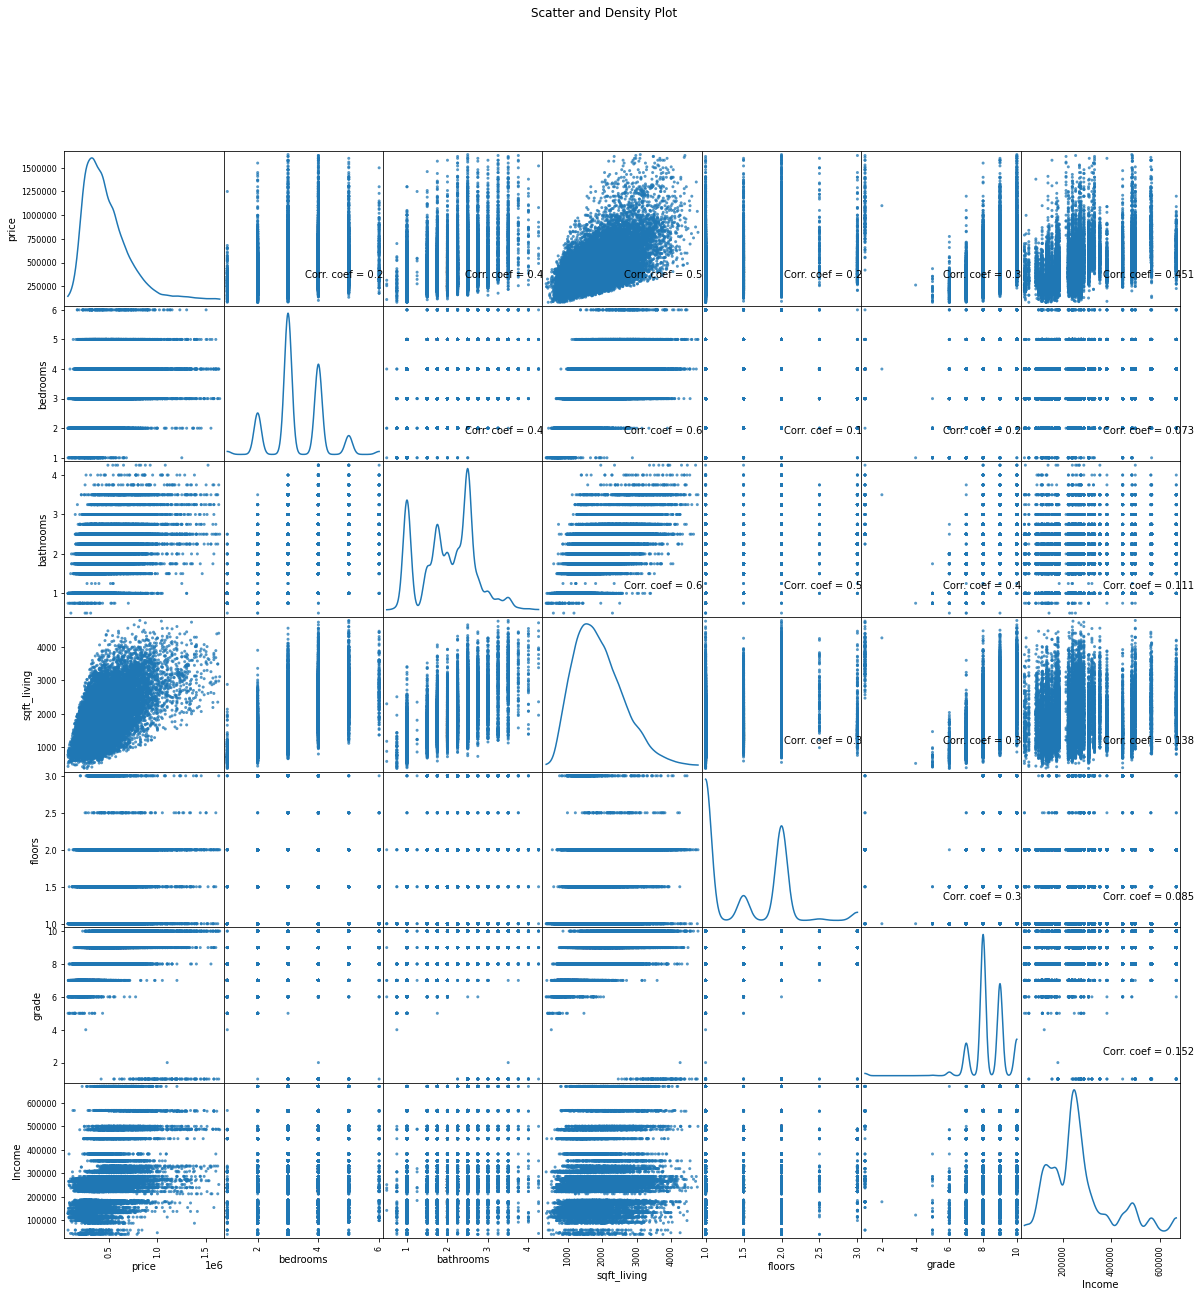

In [51]:
plotScatterMatrix(df, 20, 10)

## Preparing Data for Linear Regression

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)


In [53]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [54]:
# Evaluating Model
print(lin_reg.intercept_)

-0.003986424033032611


In [55]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
bedrooms       -0.120106
bathrooms      -0.022270
sqft_living     0.594691
floors          0.032532
grade           0.057940
Income          0.368552

## Using our Model to Predict Outcomes

In [56]:
pred = lin_reg.predict(X_test)


In [57]:


pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values' , y='Predicted Values')





:Scatter   [True Values]   (Predicted Values)

In [58]:
pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

In [59]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print(y_train, train_pred)

Test set evaluation:
_____________________________________
[ 0.31462903 -1.1010584   0.01779134 ... -0.51194976 -0.87272172
  0.14565988] [-1.07705346 -1.33239104  0.70226324 ... -1.07465296 -0.3744719
  0.27907029]
Train set evaluation:
_____________________________________
[ 0.78271923  1.82165113 -0.57588403 ... -0.39321469 -0.39344302
  0.44249757] [ 0.26201924  0.63228682 -0.59522528 ...  0.01141171 -0.44101304
 -0.34441403]


## Linear Regression

In [65]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error 
from sklearn import preprocessing
from math import log


In [ ]:
train_data, test_data = train_test_split(data, train_size = 0.8, random_state = 10)